# **ThinkHumble Assignment** : Customer Churn Prediction
* Name - Ajay
* University - VIT Bhopal University
* email id - ajaysinghpoonia805@gmail.com

## Tasks List:
1. Data Generation
2. Exploratory Data Analysis
3. Data Preprocessing
4. Feature Engineering
5. Model Building
6. Model Selection and Evaluation
7. Model Deployment

## 1. Data Generation

**Key note and thing keep in mind from assignment**
* *Data Quality:* Introduce specific data quality issues like missing values, outliers, or 
inconsistencies_lifetime_value

**Tasks in data generation**
* Generate a synthetic dataset of 5000 customer records containing the following features:
    * `CustomerID`
    * `Age`
    * `Gender`
    * `ContractType` (Month-to-month, One year, Two year)
    * `MonthlyCharges`
    * `TotalCharges`
    * `TechSupport`
    * `InternetService` (DSL, Fiber optic, No)
    * `Tenure`
    * `PaperlessBilling`
    * `PaymentMethod`
    * `Churn` (Yes/No)
* Introduce realistic distributions, correlations, and outliers to the data.
* Ensure a target churn rate of approximately 20%.
* Create derived features like `average_monthly_charges`, `customer_lifetime_value`

* Here `faker` package is used to genrate the data to make it a more realistic but only used for features like `CustomerID`, `Age`, `Gender`, `ContractType`, `TechSupport`, `InternetService`, `PaperlessBilling` and `PaymentMethod`.
* To introduce realistic data we need to use `random` from `numpy` to make numerical values more realistic 

### 1.1 Import Libraries

In [3]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.utils import shuffle

### 1.2 Generate a Dictionary for data

In [29]:
# initialise faker
fake = Faker()

# set random seed
Faker.seed(42)
np.random.seed(42)

#according to given tasks initialise the values
no_data = 5000
churn_rate = 0.2 # 20% in fraction is 0.2
null_percentage = 0.05 # null percentage 50%

# Fuctions to make the process more readable and make is realistic data
def gen_ContractType():
    return fake.random_element(elements=['Month-to-month', 'One year', 'Two year'])

def gen_MonthlyCharges(contract_type):
    if contract_type == 'Month-to-month':
        return np.random.uniform(30, 100)
    elif contract_type == 'One year':
        return np.random.uniform(40, 90)
    else:  # Two year
        return np.random.uniform(50, 80)

def gen_TotalCharges(monthly_charges, tenure):
    return monthly_charges * tenure

def gen_Tenure():
    return np.random.randint(1, 73)  # 1 month to 6 years

def gen_Churn():
    return np.random.choice(['Yes', 'No'], p=[churn_rate, 1 - churn_rate])

# define dictionaries and prepare each feature with keys and its tuples with values
data = {
    'CustomerID': [fake.uuid4() for _ in range(no_data)],
    'Age': [fake.random_int(min=18, max=70) for _ in range(no_data)],
    'Gender': [fake.random_element(elements=['Male', 'Female']) for _ in range(no_data)],
    'ContractType': [gen_ContractType() for _ in range(no_data)],
    'TechSupport': [fake.random_element(elements=['Yes', 'No']) for _ in range(no_data)],
    'InternetService': [fake.random_element(elements=['DSL', 'Fiber optic', 'No']) for _ in range(no_data)],
    'Tenure': [gen_Tenure() for _ in range(no_data)],
    'PaperlessBilling': [fake.random_element(elements=['Yes', 'No']) for _ in range(no_data)],
    'PaymentMethod': [fake.random_element(elements=['UPI', 'check/DD', 'IMPS/NEFT', 'Card']) for _ in range(no_data)],
}

# Generate MonthlyCharges and TotalCharges features with correlations
data['MonthlyCharges'] = [gen_MonthlyCharges(contract) for contract in data['ContractType']]
data['TotalCharges'] = [gen_TotalCharges(data['MonthlyCharges'][i], data['Tenure'][i]) for i in range(no_data)]
data['Churn'] = [gen_Churn() for _ in range(no_data)]

# Now we have everything in data format let's convert into DataFrame to do more operations with data

### 1.3 Dictionary data into data frame

In [30]:
data_df = pd.DataFrame(data)
data_df.head()

CustomerID  Age  Gender    ContractType  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   54    Male        Two year   
1  23b8c1e9-3924-46de-beb1-3b9046685257   57  Female        Two year   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9   62  Female        One year   
3  972a8469-1641-4f82-8b9d-2434e465e150   66  Female        One year   
4  17fc695a-07a0-4a6e-8822-e8f36c031199   69    Male  Month-to-month   

  TechSupport InternetService  Tenure PaperlessBilling PaymentMethod  \
0          No     Fiber optic      52               No           UPI   
1          No     Fiber optic      15              Yes          Card   
2          No     Fiber optic      72              Yes      check/DD   
3         Yes             DSL      61               No           UPI   
4          No     Fiber optic      21               No     IMPS/NEFT   

   MonthlyCharges  TotalCharges Churn  
0       79.685160   4143.628320   Yes  
1       70.529427   1057.941412    No  
2       87.449033   6296.330401    No  
3       47.127828   2874.797493    No  
4       56.749763   1191.745028   Yes

In [31]:
data_df.shape

(5000, 12)

Now we have **12** features and **5000** rows but still we need **2** drived features 

### 1.4 Drived Features `average_monthly_charges` and `customer_lifetime_value`

In [32]:
data_df['average_monthly_charges'] = data_df['TotalCharges'] / data_df['Tenure']
data_df['customer_lifetime_value'] = data_df['TotalCharges']
data_df.head()

CustomerID  Age  Gender    ContractType  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   54    Male        Two year   
1  23b8c1e9-3924-46de-beb1-3b9046685257   57  Female        Two year   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9   62  Female        One year   
3  972a8469-1641-4f82-8b9d-2434e465e150   66  Female        One year   
4  17fc695a-07a0-4a6e-8822-e8f36c031199   69    Male  Month-to-month   

  TechSupport InternetService  Tenure PaperlessBilling PaymentMethod  \
0          No     Fiber optic      52               No           UPI   
1          No     Fiber optic      15              Yes          Card   
2          No     Fiber optic      72              Yes      check/DD   
3         Yes             DSL      61               No           UPI   
4          No     Fiber optic      21               No     IMPS/NEFT   

   MonthlyCharges  TotalCharges Churn  average_monthly_charges  \
0       79.685160   4143.628320   Yes                79.685160   
1       70.529427   1057.941412    No                70.529427   
2       87.449033   6296.330401    No                87.449033   
3       47.127828   2874.797493    No                47.127828   
4       56.749763   1191.745028   Yes                56.749763   

   customer_lifetime_value  
0              4143.628320  
1              1057.941412  
2              6296.330401  
3              2874.797493  
4              1191.745028

### 1.5 check 20% churn rate if not then adjust it

In [33]:
actual_churn_rate = data_df['Churn'].value_counts(normalize=True).get('Yes', 0)
if actual_churn_rate != churn_rate:
    num_churn = int(no_data * churn_rate)
    num_non_churn = no_data - num_churn
    data_df.loc[data_df['Churn'] == 'Yes', 'Churn'] = 'No'
    data_df.loc[data_df.index[:num_churn], 'Churn'] = 'Yes'

### 1.6 Introduce outliers, shuffle the data and put some null values 

In [35]:
# set random seed
Faker.seed(42)
np.random.seed(42)

# Shuffle the DataFrame
data_df = shuffle(data_df, random_state=42)

# Adding a few extreme outliers in MonthlyCharges and TotalCharges
num_outliers = 100
outlier_indices = np.random.choice(data_df.index, num_outliers, replace=False)
data_df.loc[outlier_indices, 'MonthlyCharges'] *= np.random.uniform(3, 10, num_outliers)
data_df.loc[outlier_indices, 'TotalCharges'] *= np.random.uniform(2, 5, num_outliers)

# Introduce null values
num_nulls = int(no_data * null_percentage)
null_indices = np.random.choice(data_df.index, num_nulls, replace=False)

# Nullify values in specific columns
data_df.loc[np.random.choice(null_indices, num_nulls // 3, replace=False), 'MonthlyCharges'] = np.nan
data_df.loc[np.random.choice(null_indices, num_nulls // 3, replace=False), 'TotalCharges'] = np.nan
data_df.loc[np.random.choice(null_indices, num_nulls // 3, replace=False), 'TechSupport'] = np.nan

data_df.head(10)

CustomerID  Age  Gender    ContractType  \
2115  8e2ac3ff-3c5d-4a42-8dd8-af09451b6267   46  Female        Two year   
1940  96f01335-c5ab-48da-a435-4021392a9fc4   46  Female        Two year   
641   4082cbb9-48bd-4b3e-a2f5-df2badaa44ca   36    Male        One year   
2980  4d4f6814-d385-4240-92a2-f8390acfc6ac   32    Male        One year   
4861  eb1313b7-95d1-4b6d-ae9a-e156325cba4e   58    Male        One year   
931   186b2880-ab54-4a15-a69d-01ff1634725b   30  Female  Month-to-month   
4743  0b070a68-c8f2-47a3-a221-3776427ae472   66  Female        Two year   
3193  4648bbe8-f84c-47a9-b6cf-d2d52cd6e8df   43  Female  Month-to-month   
2281  9399ad15-a37c-41c5-842b-266b1b02fa24   41    Male        One year   
4219  7f702973-7aca-4b76-a2ec-f870bb15894a   68  Female        Two year   

     TechSupport InternetService  Tenure PaperlessBilling PaymentMethod  \
2115         Yes     Fiber optic      13               No     IMPS/NEFT   
1940          No     Fiber optic      45               No           UPI   
641           No              No       4              Yes      check/DD   
2980          No              No      18              Yes          Card   
4861          No             DSL      50               No      check/DD   
931          Yes             DSL      52              Yes      check/DD   
4743         NaN              No      66              Yes          Card   
3193          No              No      11               No     IMPS/NEFT   
2281         Yes     Fiber optic      54              Yes           UPI   
4219         Yes     Fiber optic      36              Yes     IMPS/NEFT   

      MonthlyCharges  TotalCharges Churn  average_monthly_charges  \
2115      240.490678   2913.291300    No                54.670778   
1940      211.898122   9096.153535    No                62.531257   
641       489.409449   1032.705208   Yes                70.123459   
2980      562.296484   6463.180569    No                74.371843   
4861      189.032991   4747.929909    No                42.237572   
931       662.831613  13805.572524   Yes                96.129517   
4743      559.651520  17820.700454    No                62.214929   
3193      272.657740    778.577633    No                30.824591   
2281      387.311794   4907.239113    No                40.806232   
4219      419.606670   8378.737389    No                75.452532   

      customer_lifetime_value  
2115               710.720113  
1940              2813.906565  
641                280.493834  
2980              1338.693175  
4861              2111.878585  
931               4998.734869  
4743              4106.185311  
3193               339.070505  
2281              2203.536545  
4219              2716.291145

In [36]:
data_df.shape

(5000, 14)

In [37]:
data_df = data_df.reset_index()
data_df.head()

index                            CustomerID  Age  Gender ContractType  \
0   2115  8e2ac3ff-3c5d-4a42-8dd8-af09451b6267   46  Female     Two year   
1   1940  96f01335-c5ab-48da-a435-4021392a9fc4   46  Female     Two year   
2    641  4082cbb9-48bd-4b3e-a2f5-df2badaa44ca   36    Male     One year   
3   2980  4d4f6814-d385-4240-92a2-f8390acfc6ac   32    Male     One year   
4   4861  eb1313b7-95d1-4b6d-ae9a-e156325cba4e   58    Male     One year   

  TechSupport InternetService  Tenure PaperlessBilling PaymentMethod  \
0         Yes     Fiber optic      13               No     IMPS/NEFT   
1          No     Fiber optic      45               No           UPI   
2          No              No       4              Yes      check/DD   
3          No              No      18              Yes          Card   
4          No             DSL      50               No      check/DD   

   MonthlyCharges  TotalCharges Churn  average_monthly_charges  \
0      240.490678   2913.291300    No                54.670778   
1      211.898122   9096.153535    No                62.531257   
2      489.409449   1032.705208   Yes                70.123459   
3      562.296484   6463.180569    No                74.371843   
4      189.032991   4747.929909    No                42.237572   

   customer_lifetime_value  
0               710.720113  
1              2813.906565  
2               280.493834  
3              1338.693175  
4              2111.878585

In [38]:
data_df = data_df.drop("index", axis=1)
data_df.head()

CustomerID  Age  Gender ContractType TechSupport  \
0  8e2ac3ff-3c5d-4a42-8dd8-af09451b6267   46  Female     Two year         Yes   
1  96f01335-c5ab-48da-a435-4021392a9fc4   46  Female     Two year          No   
2  4082cbb9-48bd-4b3e-a2f5-df2badaa44ca   36    Male     One year          No   
3  4d4f6814-d385-4240-92a2-f8390acfc6ac   32    Male     One year          No   
4  eb1313b7-95d1-4b6d-ae9a-e156325cba4e   58    Male     One year          No   

  InternetService  Tenure PaperlessBilling PaymentMethod  MonthlyCharges  \
0     Fiber optic      13               No     IMPS/NEFT      240.490678   
1     Fiber optic      45               No           UPI      211.898122   
2              No       4              Yes      check/DD      489.409449   
3              No      18              Yes          Card      562.296484   
4             DSL      50               No      check/DD      189.032991   

   TotalCharges Churn  average_monthly_charges  customer_lifetime_value  
0   2913.291300    No                54.670778               710.720113  
1   9096.153535    No                62.531257              2813.906565  
2   1032.705208   Yes                70.123459               280.493834  
3   6463.180569    No                74.371843              1338.693175  
4   4747.929909    No                42.237572              2111.878585

In [39]:
data_df.shape

(5000, 14)

**Now we are ready with data lets save it in csv file so that we can use it later**

### 1.7 Save the data in csv format

In [40]:
data_df.to_csv('Customer_churn_data.csv', index=False)

## 2. Exploratory Data Analysis

**Tasks in EDA:**
* Perform in-depth EDA to understand the dataset characteristics.
* Calculate summary statistics for numerical columns.
* Analyze categorical data distributions.
* Visualize relationships between features and the target variable (churn).
* Identify potential correlations and patterns.

### 2.1 Perform in-depth EDA to understand the dataset characteristics.

In [41]:
data_df.shape

(5000, 14)

Shape of generated data - 5000 examples (labels) and 14 features

In [42]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               5000 non-null   object 
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   ContractType             5000 non-null   object 
 4   TechSupport              4917 non-null   object 
 5   InternetService          5000 non-null   object 
 6   Tenure                   5000 non-null   int64  
 7   PaperlessBilling         5000 non-null   object 
 8   PaymentMethod            5000 non-null   object 
 9   MonthlyCharges           4917 non-null   float64
 10  TotalCharges             4917 non-null   float64
 11  Churn                    5000 non-null   object 
 12  average_monthly_charges  5000 non-null   float64
 13  customer_lifetime_value  5000 non-null   float64
dtypes: float64(4), int64(2),

**Inference**
* `Categorical Data` = `CustomerID`, `ContractType`, `TechSupport`, `InternetService`, `PaperlesBilling`, `PaymentMethod`, `Churn`
* `Numerical Data` = `Age`, `Tenure`, `MonthlyCharges`, `TotalCharges`, `average_monthly_charges`, `customer_lifetime_value`
* Some features contains null values also

**Checking null values**

In [46]:
data_df.isnull().sum()

CustomerID                  0
Age                         0
Gender                      0
ContractType                0
TechSupport                83
InternetService             0
Tenure                      0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges             83
TotalCharges               83
Churn                       0
average_monthly_charges     0
customer_lifetime_value     0
dtype: int64

**Inference**
* null values are there in `TechSupport`, `MonthllyCharges` and `TotalCharges` 

**Visualize**

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 2.2 Analyze categorical data distributions.

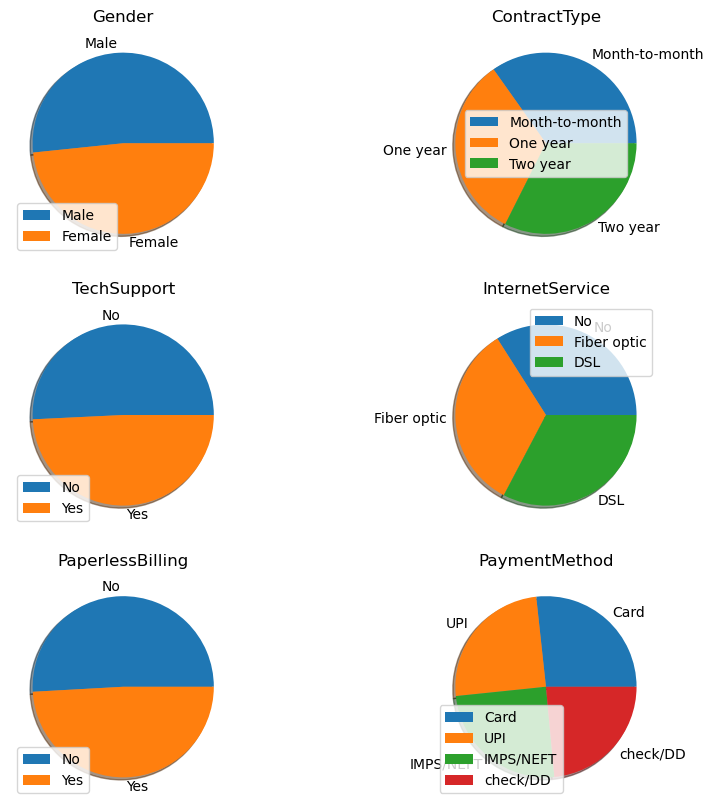

In [98]:
fig, ax = plt.subplots(nrows=3,
                        ncols=2,
                        figsize=(10,10))

categorical_data = ["Gender", "ContractType", "TechSupport", "InternetService", "PaperlessBilling", "PaymentMethod"]
j = 0 
k = 0
for i in categorical_data:
    dt = data_df[i].value_counts()
    ax[j,k].pie(dt.values, labels=dt.index, shadow=True)
    ax[j,k].legend()
    ax[j,k].set(title=i)
    if(k==1):
        j += 1
        k = 0
    else:
        k += 1

**Note** - After preprocessing we will visualise its destribution 

### 2.3 Visualize relationships between features and the target variable (churn).

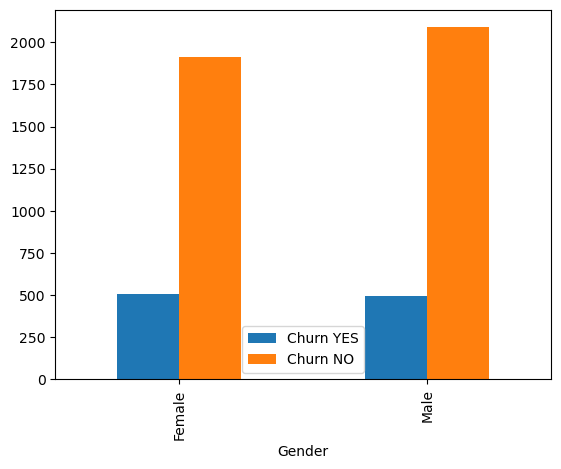

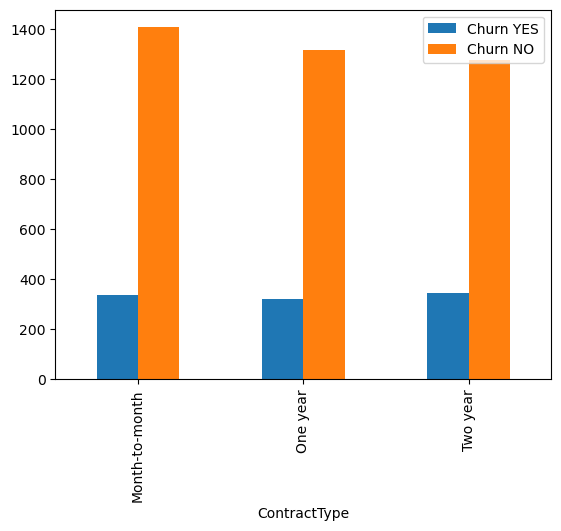

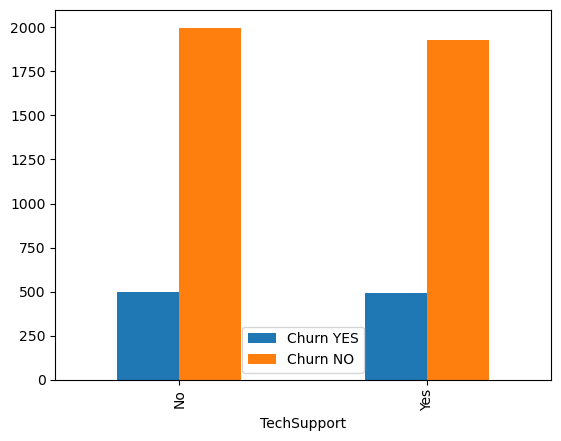

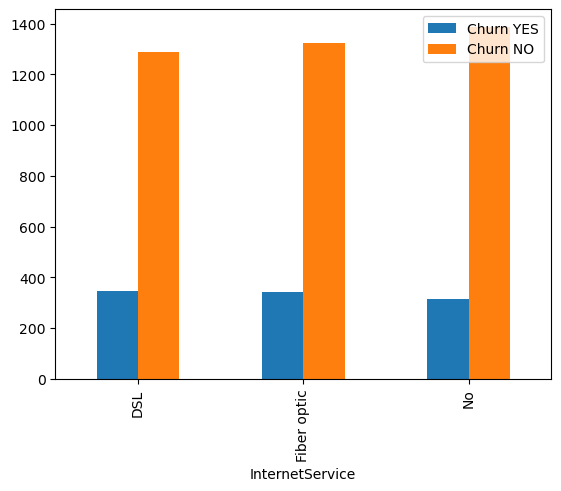

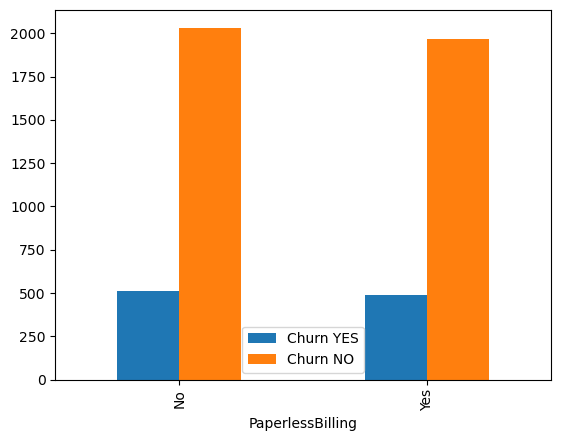

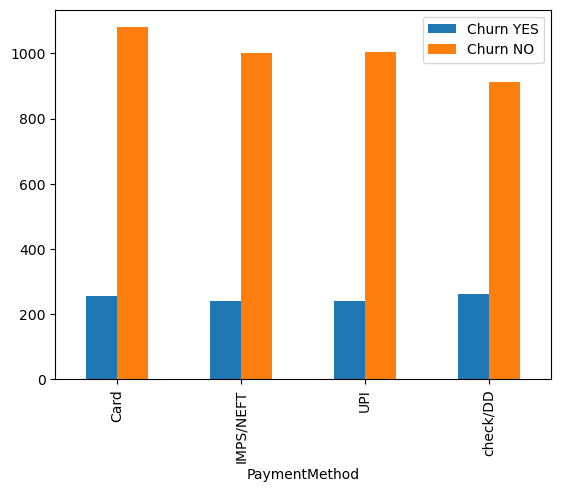

In [138]:
categorical_data = ["Gender", "ContractType", "TechSupport", "InternetService", "PaperlessBilling", "PaymentMethod"]
j = 0 
k = 0
for i in categorical_data:
    df = pd.DataFrame(data_df["Churn"][data_df["Churn"]=="Yes"].groupby(by=data_df[i]).count())
    df["Churn YES"] = pd.DataFrame(data_df["Churn"][data_df["Churn"]=="Yes"].groupby(by=data_df[i]).count())
    df["Churn NO"] = pd.DataFrame(data_df["Churn"][data_df["Churn"]=="No"].groupby(by=data_df[i]).count())
    df = df.drop("Churn", axis=1)
    df.plot.bar();

let's just contraint on no

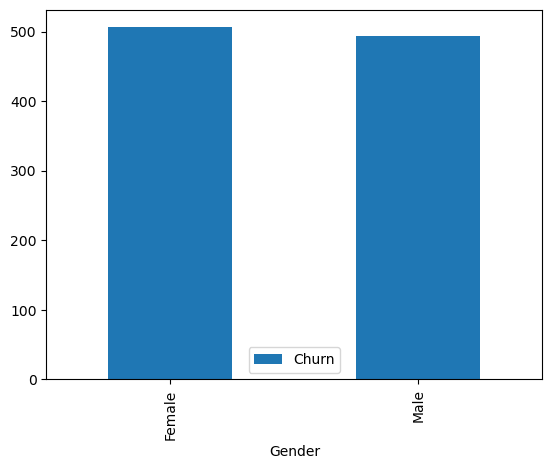

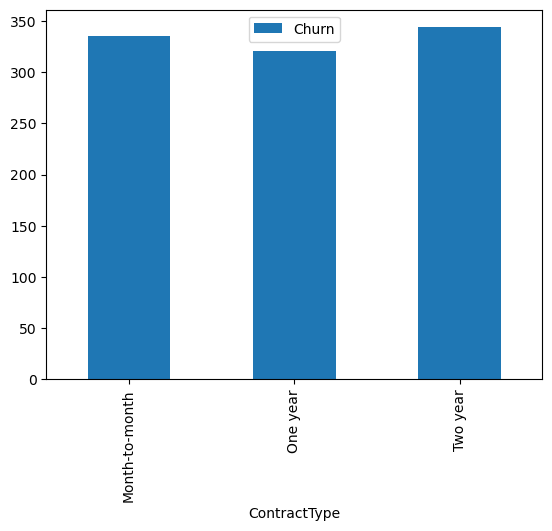

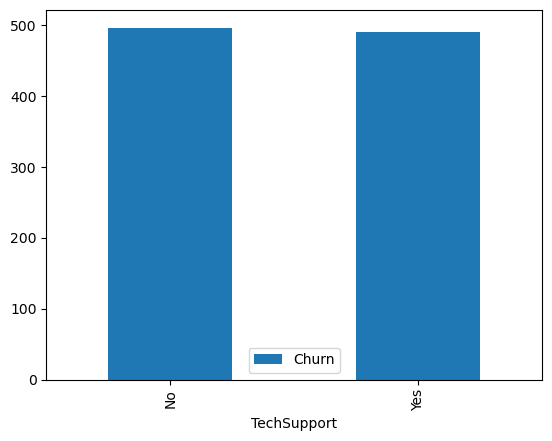

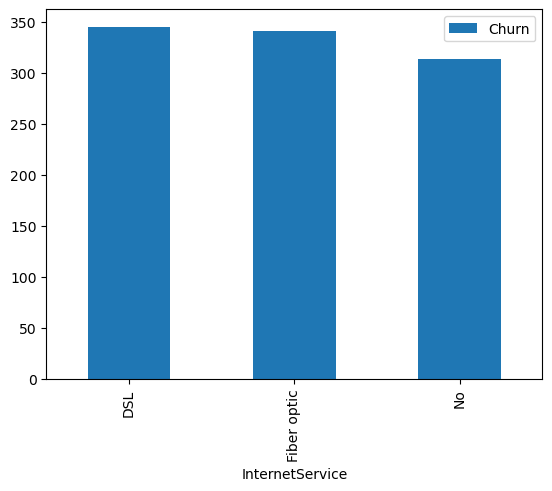

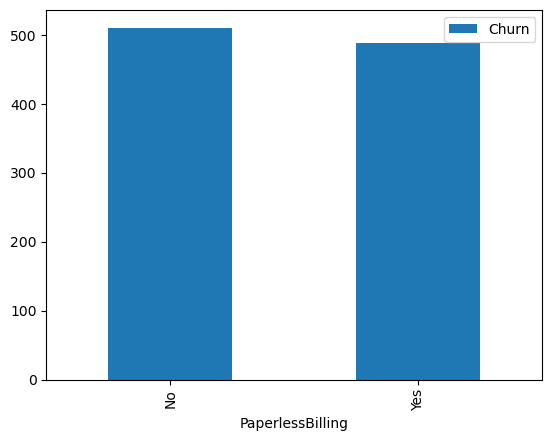

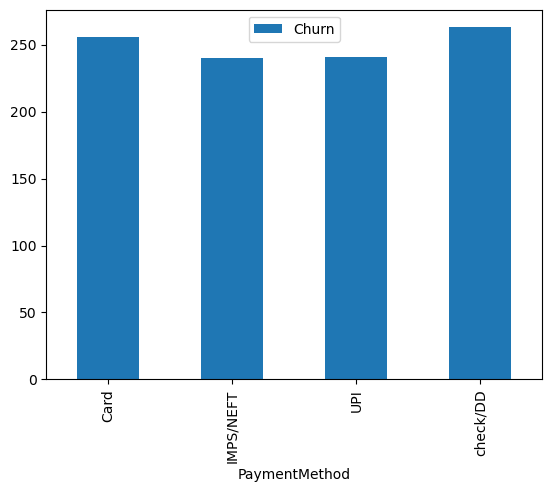

In [139]:
categorical_data = ["Gender", "ContractType", "TechSupport", "InternetService", "PaperlessBilling", "PaymentMethod"]
j = 0 
k = 0
for i in categorical_data:
    df = pd.DataFrame(data_df["Churn"][data_df["Churn"]=="Yes"].groupby(by=data_df[i]).count())
    df.plot.bar();

**Inference**
* Above bar plots convey that the specific category of data is not affecting the churn rate alot

In [140]:
data_df.head()

CustomerID  Age  Gender ContractType TechSupport  \
0  8e2ac3ff-3c5d-4a42-8dd8-af09451b6267   46  Female     Two year         Yes   
1  96f01335-c5ab-48da-a435-4021392a9fc4   46  Female     Two year          No   
2  4082cbb9-48bd-4b3e-a2f5-df2badaa44ca   36    Male     One year          No   
3  4d4f6814-d385-4240-92a2-f8390acfc6ac   32    Male     One year          No   
4  eb1313b7-95d1-4b6d-ae9a-e156325cba4e   58    Male     One year          No   

  InternetService  Tenure PaperlessBilling PaymentMethod  MonthlyCharges  \
0     Fiber optic      13               No     IMPS/NEFT      240.490678   
1     Fiber optic      45               No           UPI      211.898122   
2              No       4              Yes      check/DD      489.409449   
3              No      18              Yes          Card      562.296484   
4             DSL      50               No      check/DD      189.032991   

   TotalCharges Churn  average_monthly_charges  customer_lifetime_value  
0   2913.291300    No                54.670778               710.720113  
1   9096.153535    No                62.531257              2813.906565  
2   1032.705208   Yes                70.123459               280.493834  
3   6463.180569    No                74.371843              1338.693175  
4   4747.929909    No                42.237572              2111.878585

In [146]:
data_df["churn"] = 0
data_df.head()

CustomerID  Age  Gender ContractType TechSupport  \
0  8e2ac3ff-3c5d-4a42-8dd8-af09451b6267   46  Female     Two year         Yes   
1  96f01335-c5ab-48da-a435-4021392a9fc4   46  Female     Two year          No   
2  4082cbb9-48bd-4b3e-a2f5-df2badaa44ca   36    Male     One year          No   
3  4d4f6814-d385-4240-92a2-f8390acfc6ac   32    Male     One year          No   
4  eb1313b7-95d1-4b6d-ae9a-e156325cba4e   58    Male     One year          No   

  InternetService  Tenure PaperlessBilling PaymentMethod  MonthlyCharges  \
0     Fiber optic      13               No     IMPS/NEFT      240.490678   
1     Fiber optic      45               No           UPI      211.898122   
2              No       4              Yes      check/DD      489.409449   
3              No      18              Yes          Card      562.296484   
4             DSL      50               No      check/DD      189.032991   

   TotalCharges Churn  average_monthly_charges  customer_lifetime_value  churn  
0   2913.291300    No                54.670778               710.720113      0  
1   9096.153535    No                62.531257              2813.906565      0  
2   1032.705208   Yes                70.123459               280.493834      0  
3   6463.180569    No                74.371843              1338.693175      0  
4   4747.929909    No                42.237572              2111.878585      0

In [148]:
j = 0
for i in data_df['Churn']:
    if(i=="Yes"):
        data_df.churn[j] = 1
        j += 1
    else:
        data_df.churn[j] = 0
        j += 1

data_df.head()

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21592\3377604358.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21592\3377604358.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21592\3377604358.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21592\3377604358.py:7: SettingWithCopyWarning:


A value

CustomerID  Age  Gender ContractType TechSupport  \
0  8e2ac3ff-3c5d-4a42-8dd8-af09451b6267   46  Female     Two year         Yes   
1  96f01335-c5ab-48da-a435-4021392a9fc4   46  Female     Two year          No   
2  4082cbb9-48bd-4b3e-a2f5-df2badaa44ca   36    Male     One year          No   
3  4d4f6814-d385-4240-92a2-f8390acfc6ac   32    Male     One year          No   
4  eb1313b7-95d1-4b6d-ae9a-e156325cba4e   58    Male     One year          No   

  InternetService  Tenure PaperlessBilling PaymentMethod  MonthlyCharges  \
0     Fiber optic      13               No     IMPS/NEFT      240.490678   
1     Fiber optic      45               No           UPI      211.898122   
2              No       4              Yes      check/DD      489.409449   
3              No      18              Yes          Card      562.296484   
4             DSL      50               No      check/DD      189.032991   

   TotalCharges Churn  average_monthly_charges  customer_lifetime_value  churn  
0   2913.291300    No                54.670778               710.720113      0  
1   9096.153535    No                62.531257              2813.906565      0  
2   1032.705208   Yes                70.123459               280.493834      1  
3   6463.180569    No                74.371843              1338.693175      0  
4   4747.929909    No                42.237572              2111.878585      0

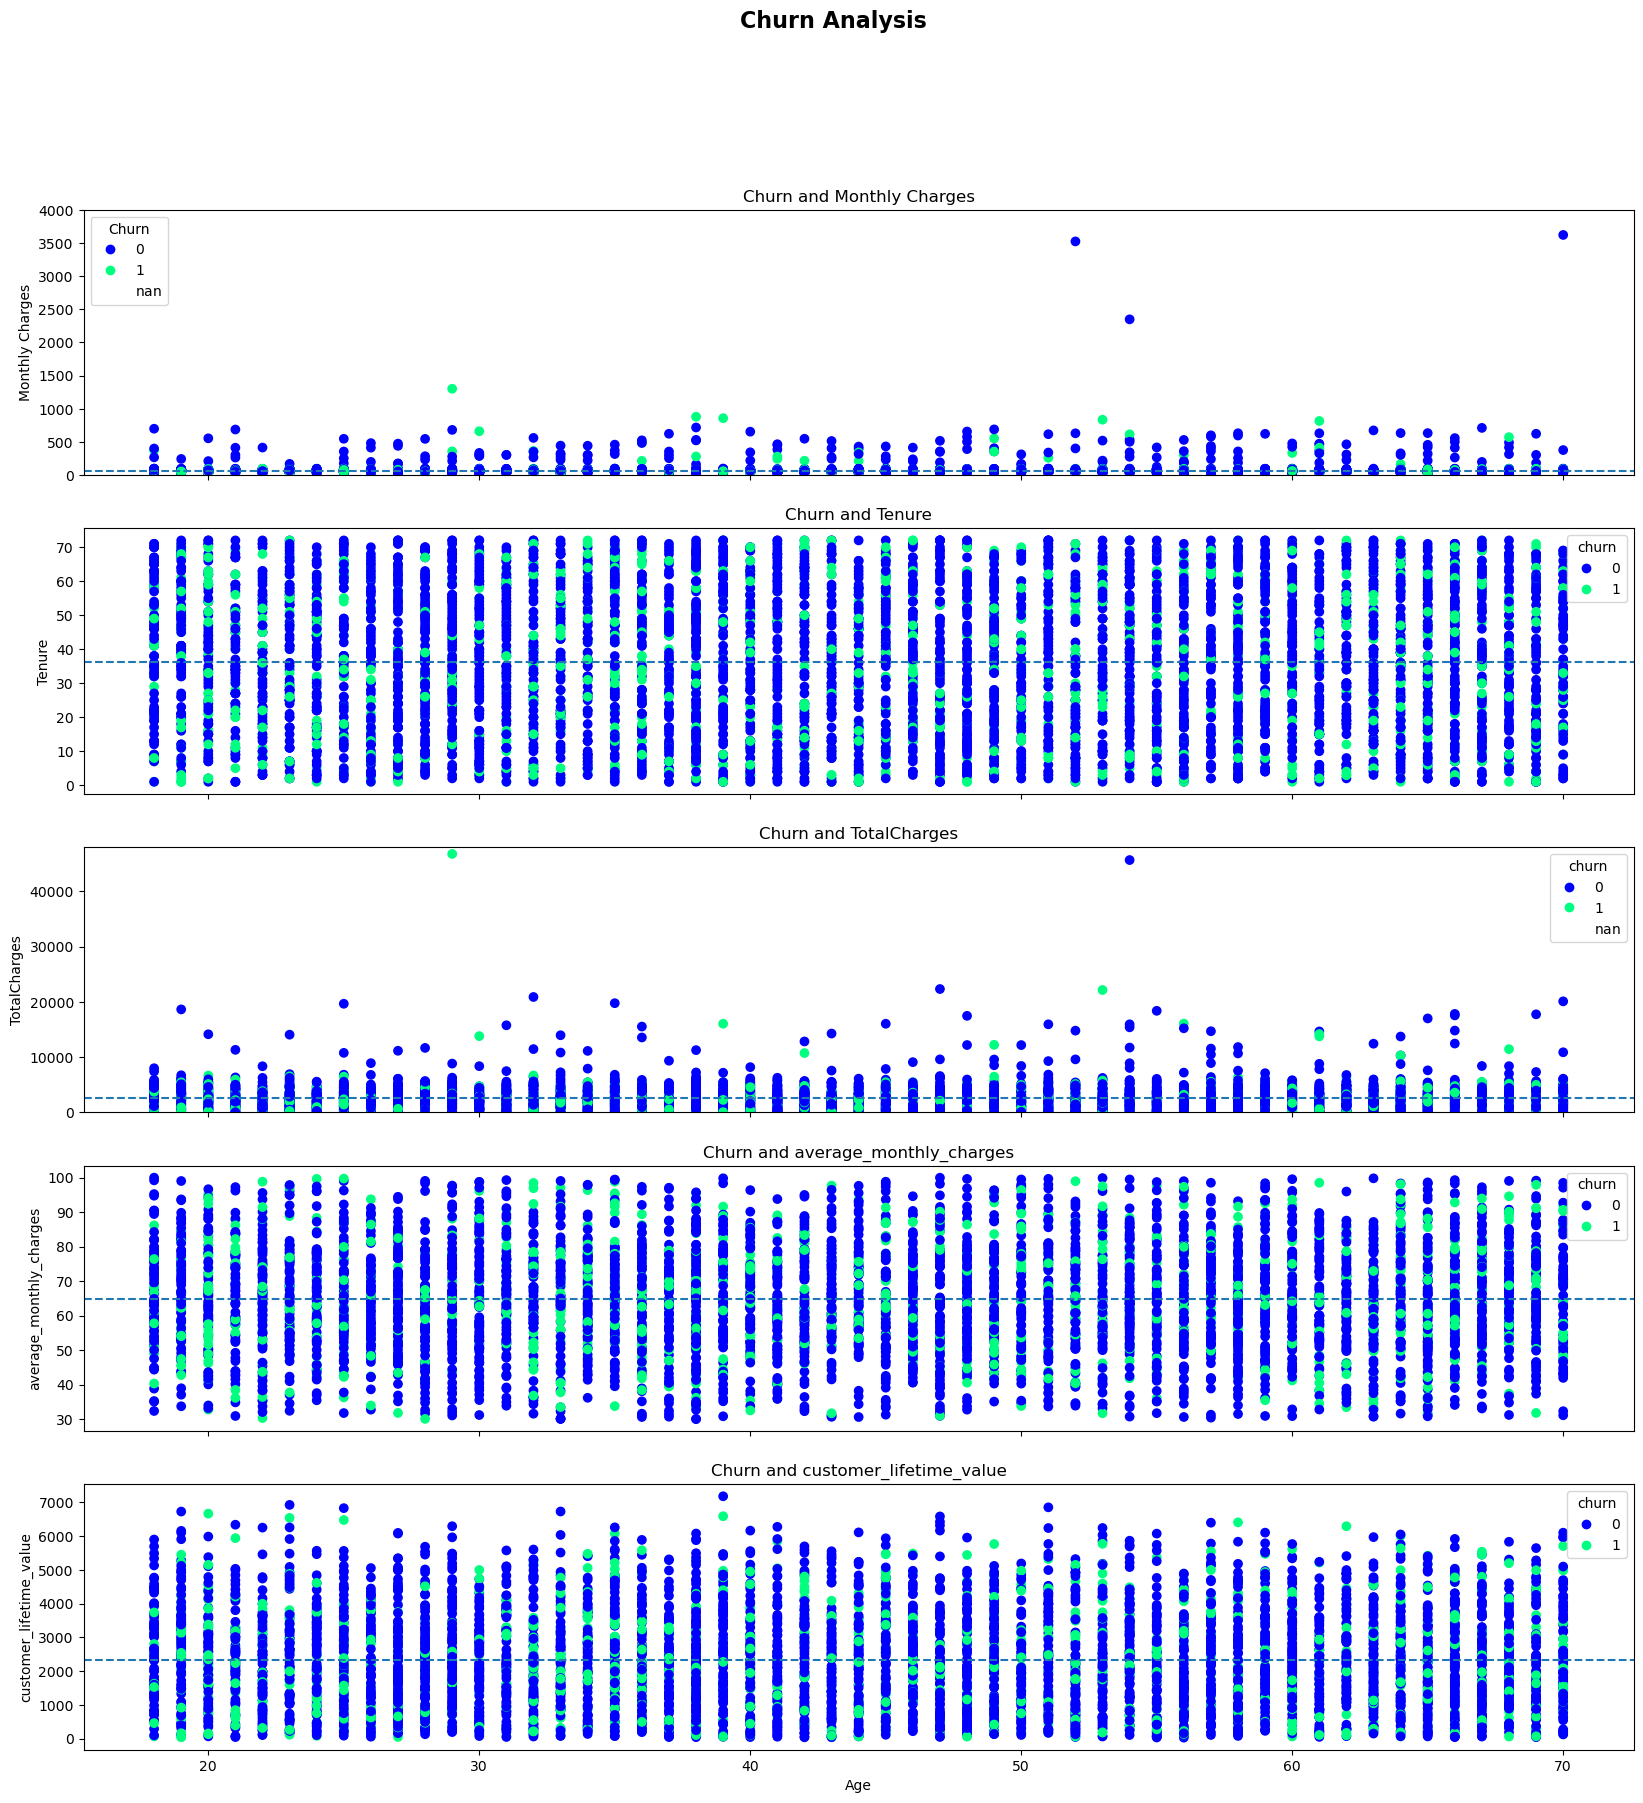

In [184]:
fig, (ax0, ax1, ax2, ax4, ax5) = plt.subplots(nrows=5,
                               ncols=1,
                               figsize=(20,20),
                              sharex=True)

#plotting for Monthly charges data
scatter = ax0.scatter(x=data_df['Age'],
                     y=data_df['MonthlyCharges'],
                     c=data_df['churn'],
                     cmap="winter")

#customize ax0
ax0.set(title="Churn and Monthly Charges",
       ylabel="Monthly Charges");

#change y-axis limit
ax0.set_ylim([0,4000])

# add legend
ax0.legend(*scatter.legend_elements(), title="Churn")

#add a mean line
ax0.axhline(data_df['average_monthly_charges'].mean(),
          linestyle="--");

#plotting for Tenure
scatter = ax1.scatter(x=data_df['Age'],
                     y=data_df['Tenure'],
                     c=data_df['churn'],
                     cmap="winter")
#customize ax1
ax1.set(title="Churn and Tenure",
       ylabel="Tenure");

#add legend
ax1.legend(*scatter.legend_elements(), title="churn");
#add a mean line
ax1.axhline(data_df['Tenure'].mean(),
           linestyle="--");

#plotting for TotalCharges
scatter = ax2.scatter(x=data_df['Age'],
                     y=data_df['TotalCharges'],
                     c=data_df['churn'],
                     cmap="winter")
#customize ax2
ax2.set(title="Churn and TotalCharges",
       ylabel="TotalCharges");

#change y-axis limit
ax2.set_ylim([0,48000])

#add legend
ax2.legend(*scatter.legend_elements(), title="churn");
#add a mean line
ax2.axhline(data_df['TotalCharges'].mean(),
           linestyle="--");

#plotting for average_monthly_charges
scatter = ax4.scatter(x=data_df['Age'],
                     y=data_df['average_monthly_charges'],
                     c=data_df['churn'],
                     cmap="winter")
#customize ax4
ax4.set(title="Churn and average_monthly_charges",
       ylabel="average_monthly_charges");


#add legend
ax4.legend(*scatter.legend_elements(), title="churn");
#add a mean line
ax4.axhline(data_df['average_monthly_charges'].mean(),
           linestyle="--");

#plotting for customer_lifetime_value
scatter = ax5.scatter(x=data_df['Age'],
                     y=data_df['customer_lifetime_value'],
                     c=data_df['churn'],
                     cmap="winter")
#customize ax5
ax5.set(title="Churn and customer_lifetime_value",
       xlabel="Age",
       ylabel="customer_lifetime_value");

#add legend
ax5.legend(*scatter.legend_elements(), title="churn");
#add a mean line
ax5.axhline(data_df['customer_lifetime_value'].mean(),
           linestyle="--");

# add a title to the figure
fig.suptitle("Churn Analysis", fontsize=16, fontweight="bold");

### 2.4 Calculate summary statistics for numerical columns

In [187]:
data_df = data_df.drop("churn", axis=1)

In [188]:
data_df.describe()

Age       Tenure  MonthlyCharges  TotalCharges  \
count  5000.00000  5000.000000     4917.000000   4917.000000   
mean     44.09140    36.299000       80.896910   2580.553263   
std      15.15284    20.646851      155.822616   2360.019593   
min      18.00000     1.000000       30.003698     30.594691   
25%      31.00000    19.000000       54.127513   1165.082091   
50%      44.00000    36.000000       65.232735   2275.093798   
75%      57.00000    54.000000       77.329925   3478.257670   
max      70.00000    72.000000     8023.399006  54970.857169   

       average_monthly_charges  customer_lifetime_value  
count              5000.000000              5000.000000  
mean                 64.664654              2344.918174  
std                  15.265925              1469.218026  
min                  30.003698                30.594691  
25%                  53.703804              1123.321576  
50%                  64.408358              2203.703096  
75%                  75.799435              3380.965641  
max                  99.962248              7184.120393

Above stattical description of data is given which tells us about the standard deviation, mean and quartiles of data
* `MonthlyCharges`, `TotalCharges` contains null values
* `MonthlyCharges`, `TotalCharges`, `average_monthly_charges`, `customer_lifetime_value` represents high `std` coveys that outliers may be present we will se later by boxplot

### 2.5 Identify potential correlations and patterns. 

* First we will preprocess the data then we wil see the correlation matrix

## 3. Data Preprocessing
* Handle missing values (if any) using appropriate techniques.
* Encode categorical features into numerical format.
* Split the dataset into training, validation, and testing sets.
* Consider techniques to handle imbalanced data (if necessary)

### 3.1 Handling missing values

In EDA  we have scene that our data contain null values lets see it again

In [192]:
data_df.isnull().sum()

CustomerID                  0
Age                         0
Gender                      0
ContractType                0
TechSupport                83
InternetService             0
Tenure                      0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges             83
TotalCharges               83
Churn                       0
average_monthly_charges     0
customer_lifetime_value     0
dtype: int64

In [195]:
data_df.count()

CustomerID                 5000
Age                        5000
Gender                     5000
ContractType               5000
TechSupport                4917
InternetService            5000
Tenure                     5000
PaperlessBilling           5000
PaymentMethod              5000
MonthlyCharges             4917
TotalCharges               4917
Churn                      5000
average_monthly_charges    5000
customer_lifetime_value    5000
dtype: int64

from above 2 we have very less missing values
* if missing values is very less than the number of examples then we can drop null rows
* else if missing values is not much less then we can't drop the rows, we have to impute data
    * Imputation:
    * for numerical
        * impute null values with mean if we don't have outliers
        * if we have outliers then we can use geometric mean
        * we can also use median according to EDA analysis
    * for catgorical
        * for categorical data we can use mode

**Here we will drop null values**

In [196]:
data_df = data_df.dropna()

In [197]:
data_df.isnull().sum()

CustomerID                 0
Age                        0
Gender                     0
ContractType               0
TechSupport                0
InternetService            0
Tenure                     0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
average_monthly_charges    0
customer_lifetime_value    0
dtype: int64

In [198]:
data_df.count()

CustomerID                 4821
Age                        4821
Gender                     4821
ContractType               4821
TechSupport                4821
InternetService            4821
Tenure                     4821
PaperlessBilling           4821
PaymentMethod              4821
MonthlyCharges             4821
TotalCharges               4821
Churn                      4821
average_monthly_charges    4821
customer_lifetime_value    4821
dtype: int64

In [200]:
data_df.dtypes

CustomerID                  object
Age                          int64
Gender                      object
ContractType                object
TechSupport                 object
InternetService             object
Tenure                       int64
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
Churn                       object
average_monthly_charges    float64
customer_lifetime_value    float64
dtype: object

**Result**
* Now  we don't have null values and we have droped `83` null rows and now we have left with `4821` examples out of `5000`

### 3.2 Encode categorical features into numerical format

**Note:** - In modeling we will use 'OneHotEncoder' but here for now we have used 'LabelEncoder'

In [207]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Gender", "ContractType", "TechSupport", "InternetService", "PaperlessBilling", "PaymentMethod", "Churn"]
encoded_data =  data_df
label_encoder = LabelEncoder() 
for i in categorical_features:
    encoded_data[i] = label_encoder.fit_transform(data_df[i])
encoded_data.head()

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21592\3296237867.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21592\3296237867.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21592\3296237867.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

CustomerID  Age  Gender  ContractType  \
0  8e2ac3ff-3c5d-4a42-8dd8-af09451b6267   46       0             2   
1  96f01335-c5ab-48da-a435-4021392a9fc4   46       0             2   
2  4082cbb9-48bd-4b3e-a2f5-df2badaa44ca   36       1             1   
3  4d4f6814-d385-4240-92a2-f8390acfc6ac   32       1             1   
4  eb1313b7-95d1-4b6d-ae9a-e156325cba4e   58       1             1   

   TechSupport  InternetService  Tenure  PaperlessBilling  PaymentMethod  \
0            1                1      13                 0              1   
1            0                1      45                 0              2   
2            0                2       4                 1              3   
3            0                2      18                 1              0   
4            0                0      50                 0              3   

   MonthlyCharges  TotalCharges  Churn  average_monthly_charges  \
0      240.490678   2913.291300      0                54.670778   
1      211.898122   9096.153535      0                62.531257   
2      489.409449   1032.705208      1                70.123459   
3      562.296484   6463.180569      0                74.371843   
4      189.032991   4747.929909      0                42.237572   

   customer_lifetime_value  
0               710.720113  
1              2813.906565  
2               280.493834  
3              1338.693175  
4              2111.878585

lets drop `CustomerID` its not useful for us

In [210]:
encoded_data = encoded_data.drop("CustomerID", axis=1)

In [211]:
encoded_data.head()

Age  Gender  ContractType  TechSupport  InternetService  Tenure  \
0   46       0             2            1                1      13   
1   46       0             2            0                1      45   
2   36       1             1            0                2       4   
3   32       1             1            0                2      18   
4   58       1             1            0                0      50   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0                 0              1      240.490678   2913.291300      0   
1                 0              2      211.898122   9096.153535      0   
2                 1              3      489.409449   1032.705208      1   
3                 1              0      562.296484   6463.180569      0   
4                 0              3      189.032991   4747.929909      0   

   average_monthly_charges  customer_lifetime_value  
0                54.670778               710.720113  
1                62.531257              2813.906565  
2                70.123459               280.493834  
3                74.371843              1338.693175  
4                42.237572              2111.878585

### 3.3 Cotinue EDA left part

**Correlation Matric**

<Axes: >

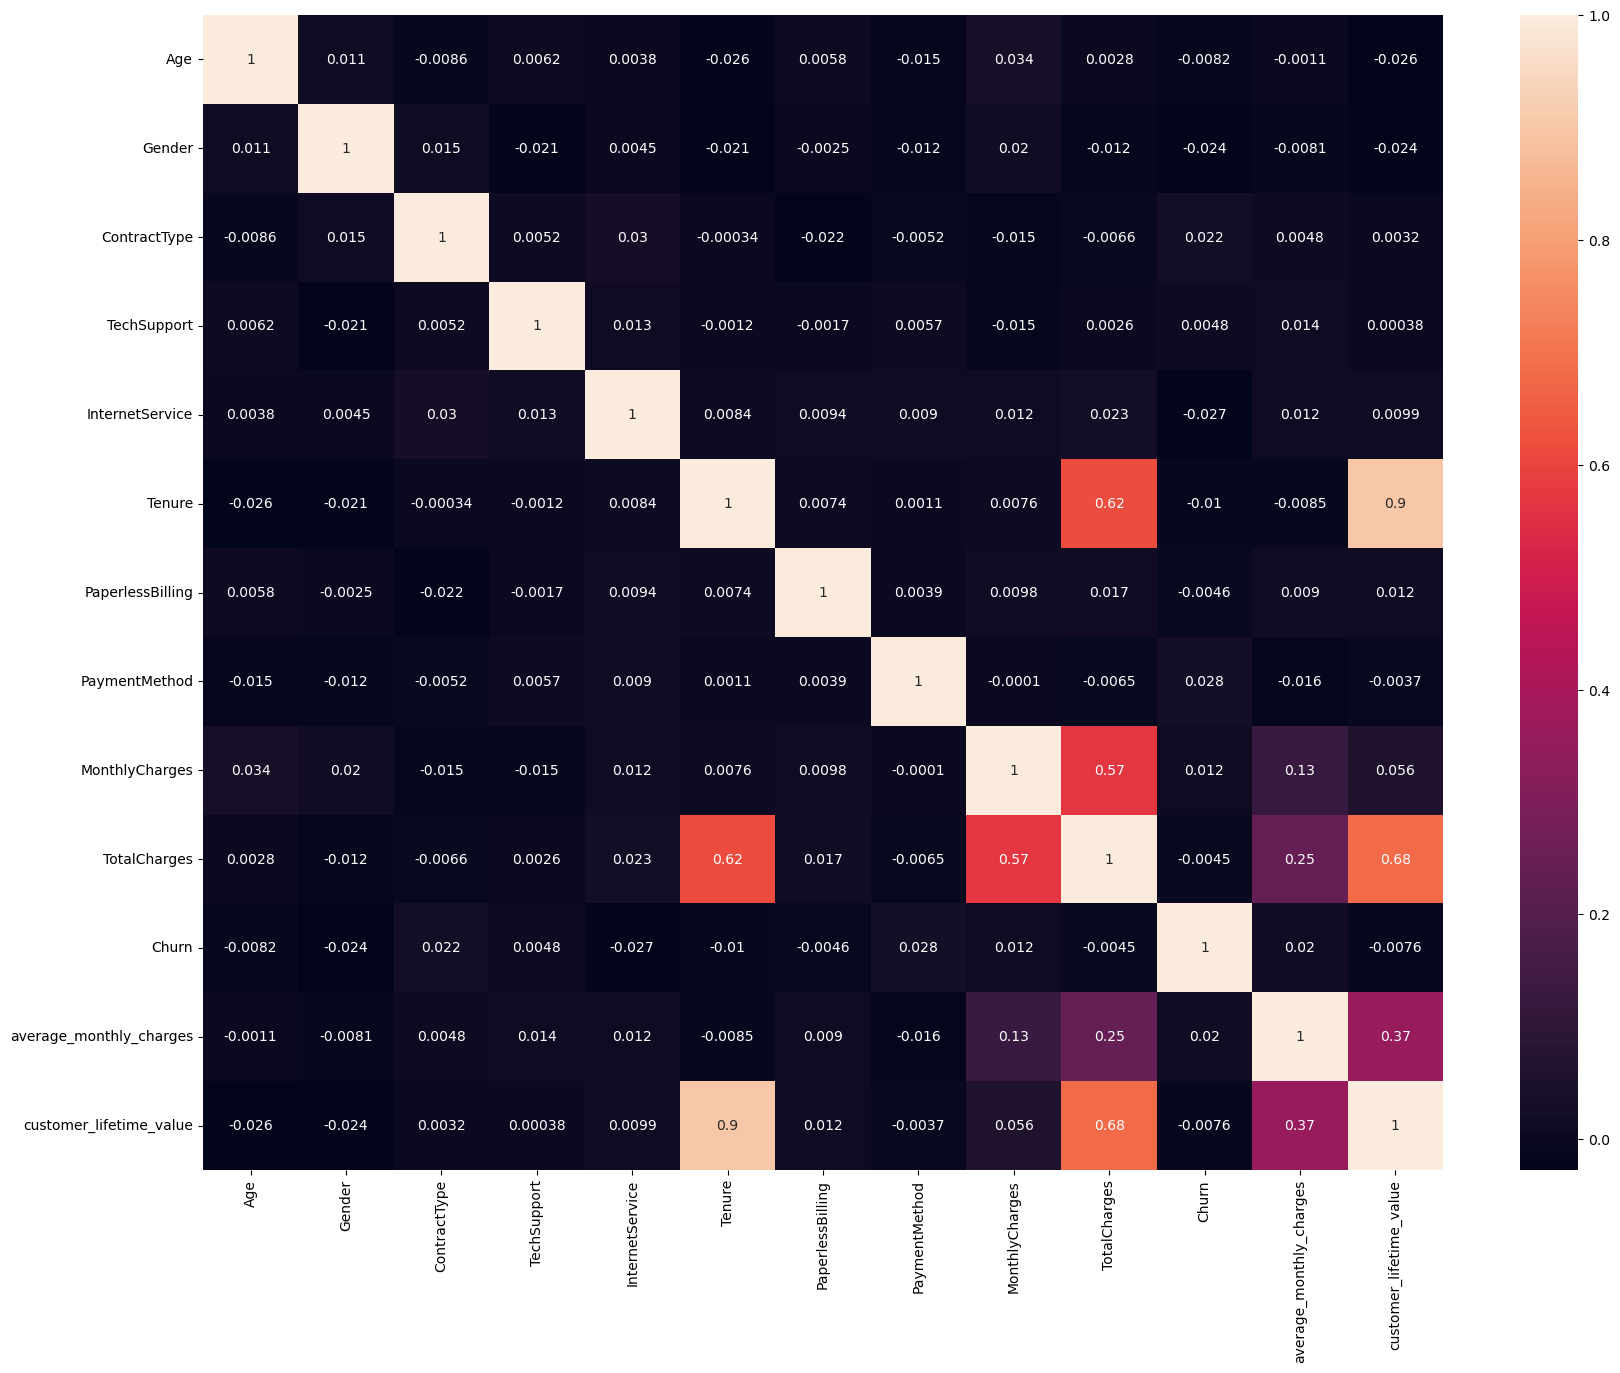

In [214]:
corr = encoded_data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

**Distribution**

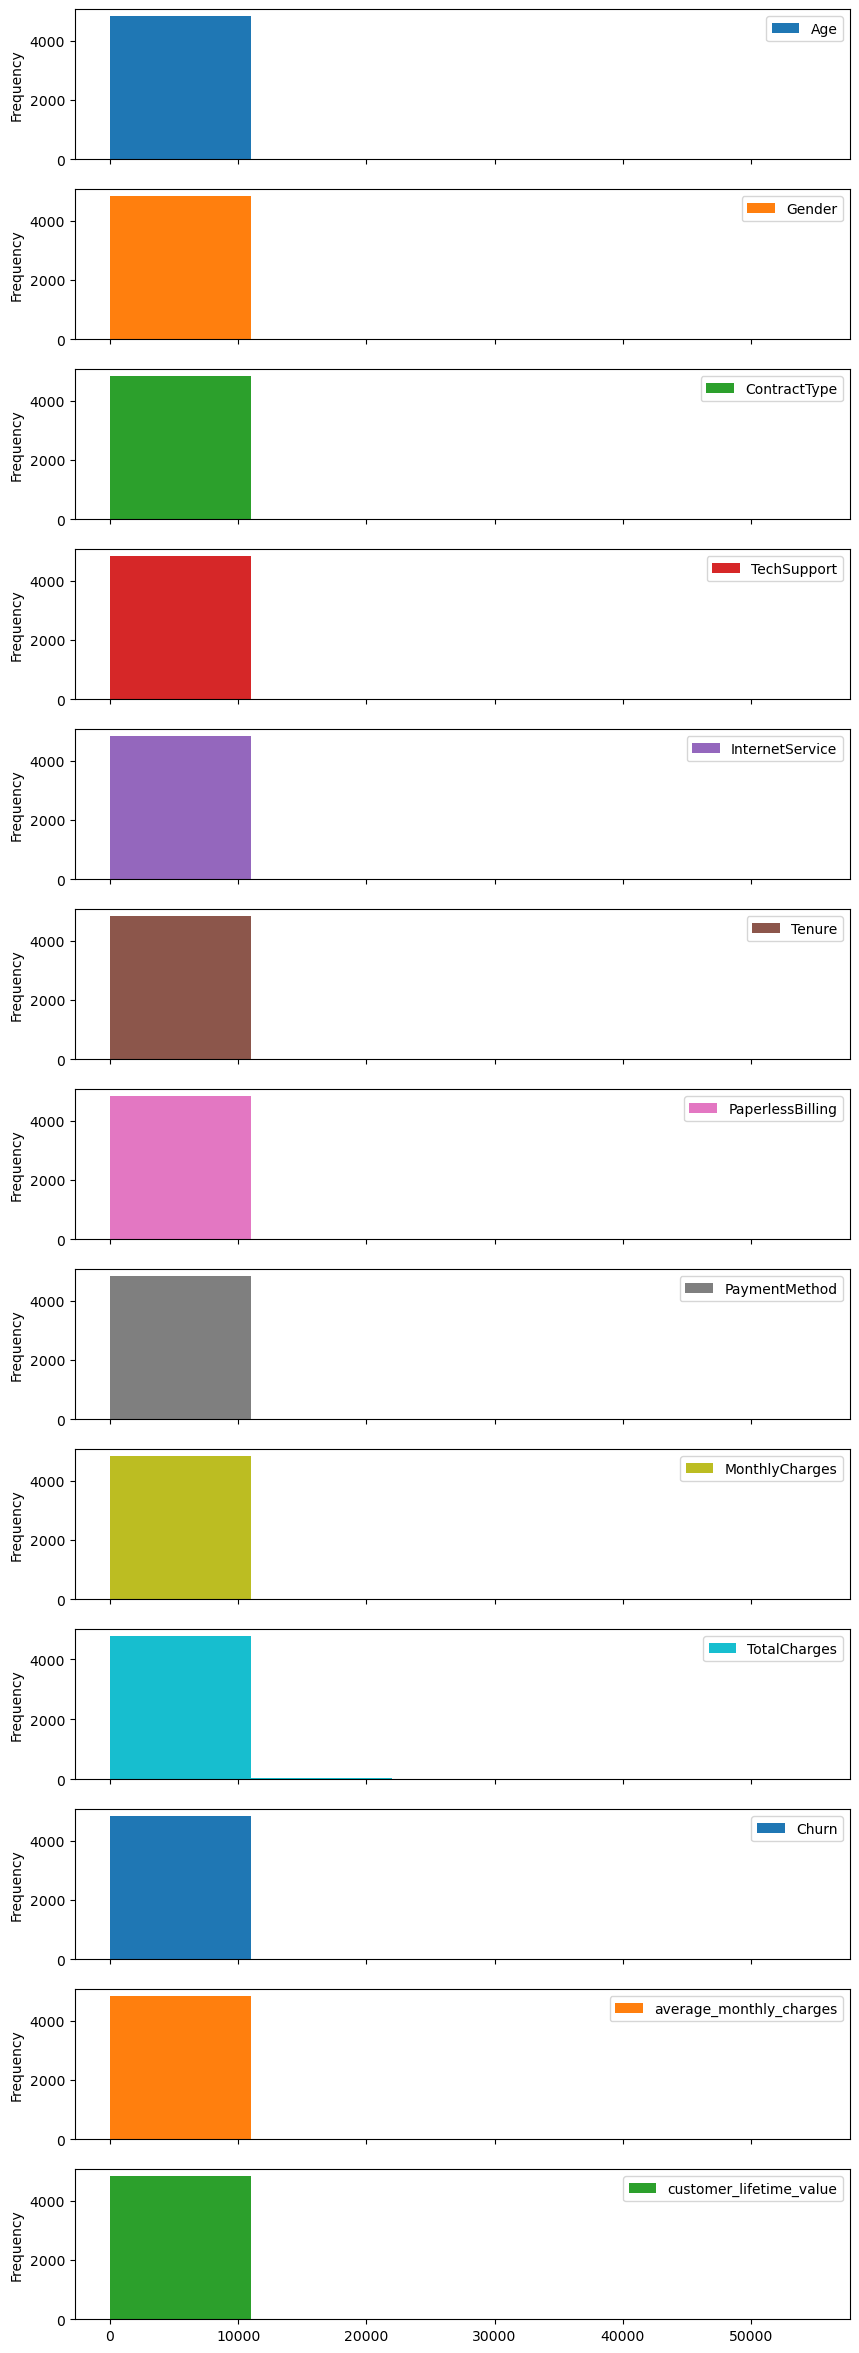

In [218]:
encoded_data.plot.hist(figsize=(10,30),subplots=True, bins=5);

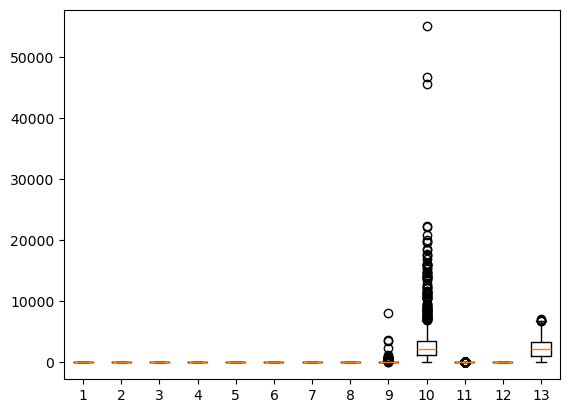

In [234]:
colnames = ["Age", "Gender", "ContractType", "TechSupport", "InternetService", "Tenure", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn", "average_monthly_charges", "customer_lifetime_value"]
plt.boxplot(encoded_data);

In [223]:
encoded_data.head()

Age  Gender  ContractType  TechSupport  InternetService  Tenure  \
0   46       0             2            1                1      13   
1   46       0             2            0                1      45   
2   36       1             1            0                2       4   
3   32       1             1            0                2      18   
4   58       1             1            0                0      50   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0                 0              1      240.490678   2913.291300      0   
1                 0              2      211.898122   9096.153535      0   
2                 1              3      489.409449   1032.705208      1   
3                 1              0      562.296484   6463.180569      0   
4                 0              3      189.032991   4747.929909      0   

   average_monthly_charges  customer_lifetime_value  
0                54.670778               710.720113  
1                62.531257              2813.906565  
2                70.123459               280.493834  
3                74.371843              1338.693175  
4                42.237572              2111.878585

**Inference**
* from above barplots we can see that `MonthlyCharges`, `TotalCharges` and  `customer_lifetime_value` contains `Outlier`

### 3.4 Split the dataset into training, validation, and testing sets.

Split `Dependent` and `Independent` variables

In [295]:
#import dataset
data_df = pd.read_csv("Customer_churn_data.csv")

#drop missing values
data_df = data_df.dropna()
print(data_df.isnull().sum())

# drop unrequired column
x = data_df.drop("CustomerID", axis=1)

#dependent variable
x = x.drop("Churn", axis=1)

#independent variable
y = data_df['Churn']

CustomerID                 0
Age                        0
Gender                     0
ContractType               0
TechSupport                0
InternetService            0
Tenure                     0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
average_monthly_charges    0
customer_lifetime_value    0
dtype: int64


In [296]:
x.head()

Age  Gender ContractType TechSupport InternetService  Tenure  \
0   46  Female     Two year         Yes     Fiber optic      13   
1   46  Female     Two year          No     Fiber optic      45   
2   36    Male     One year          No              No       4   
3   32    Male     One year          No              No      18   
4   58    Male     One year          No             DSL      50   

  PaperlessBilling PaymentMethod  MonthlyCharges  TotalCharges  \
0               No     IMPS/NEFT      240.490678   2913.291300   
1               No           UPI      211.898122   9096.153535   
2              Yes      check/DD      489.409449   1032.705208   
3              Yes          Card      562.296484   6463.180569   
4               No      check/DD      189.032991   4747.929909   

   average_monthly_charges  customer_lifetime_value  
0                54.670778               710.720113  
1                62.531257              2813.906565  
2                70.123459               280.493834  
3                74.371843              1338.693175  
4                42.237572              2111.878585

**LAbel encode `y`**

In [297]:
y

0        No
1        No
2       Yes
3        No
4        No
       ... 
4995     No
4996     No
4997     No
4998    Yes
4999     No
Name: Churn, Length: 4821, dtype: object

In [298]:
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

**now we will go with `OneHotEncoder` to encode our categorical data**

In [299]:
# Turn category data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#set reandom seed
np.random.seed(42)

#one hoe encoding
categorical_features = ["Gender", "ContractType", "TechSupport", "InternetService", "PaperlessBilling", "PaymentMethod"]
OneHot1 = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", OneHot1, categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

#train test split
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

In [300]:
df = pd.DataFrame(transformed_x)
df.head()

0    1    2    3    4    5    6    7    8    9   ...   12   13   14   15  \
0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   
2  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0   
3  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   

     16    17          18           19         20           21  
0  46.0  13.0  240.490678  2913.291300  54.670778   710.720113  
1  46.0  45.0  211.898122  9096.153535  62.531257  2813.906565  
2  36.0   4.0  489.409449  1032.705208  70.123459   280.493834  
3  32.0  18.0  562.296484  6463.180569  74.371843  1338.693175  
4  58.0  50.0  189.032991  4747.929909  42.237572  2111.878585  

[5 rows x 22 columns]

## 4. Feature Engineering:
* Create additional features based on domain knowledge and EDA insights.
*  Explore feature interactions and transformations

Above we have use `OneHotEncoder` for above 2 process of feature engineering

## 5. Model Building
* Experiment with various classification algorithms (Logistic Regression, Random Forest,Gradient Boosting, XGBoost, etc.).
* Optimize model hyperparameters using techniques like Grid Search or Randomized Search.
* Evaluate model performance using metrics like accuracy, precision, recall, F1-score, ROC curve, AUC.
* Consider ensemble methods for improved performance.

### 5.1 Initializing models
1. LogisticRegression
2. RandomForest
3. GraadientBoosting
4. XGBoost
5. AdaBoost

In [301]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import 

from sklearn.ensemble import AdaBoostClassifier

#initialise model
lg_clf = LogisticRegression(random_state=0)
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
xg_clf = XGBClassifier()
ab_clf = AdaBoostClassifier()

### 5.2 Train model

#### 5.2.1 LogisticRegression

In [302]:
lg_clf.fit(x_train,y_train)
lg_clf.score(x_test, y_test)

D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8062176165803109

#### 5.2.2 RandomForest

In [303]:
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test, y_test)

0.8010362694300518

#### 5.2.3 Gradient Boosting

In [304]:
gb_clf.fit(x_train,y_train)
gb_clf.score(x_test, y_test)

0.8031088082901554

#### 5.2.4 XGBoost

In [305]:
xg_clf.fit(x_train,y_train)
xg_clf.score(x_test, y_test)

0.7678756476683938

#### 5.2.5 AdaBoost

In [306]:
ab_clf.fit(x_train,y_train)
ab_clf.score(x_test, y_test)

D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



0.8062176165803109

### 5.3 Evaluate above models

#### 5.3.1 Classification report

In [307]:
from sklearn.metrics import classification_report

##### 5.3.1.1 Logistic regression

In [322]:
lg_preds = lg_clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       778
           1       0.50      0.01      0.01       187

    accuracy                           0.81       965
   macro avg       0.65      0.50      0.45       965
weighted avg       0.75      0.81      0.72       965



##### 5.3.1.2 RandomForest

In [313]:
rf_preds = rf_clf.predict(x_test)
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       778
           1       0.14      0.01      0.01       187

    accuracy                           0.80       965
   macro avg       0.47      0.50      0.45       965
weighted avg       0.68      0.80      0.72       965



#### 5.3.1.3 Gradient Boosting

In [314]:
gb_preds = gb_clf.predict(x_test)
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       778
           1       0.29      0.01      0.02       187

    accuracy                           0.80       965
   macro avg       0.55      0.50      0.46       965
weighted avg       0.71      0.80      0.72       965



#### 5.3.1.2 XGBoost

In [315]:
xg_preds = xg_clf.predict(x_test)
print(classification_report(y_test, xg_preds))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       778
           1       0.14      0.04      0.06       187

    accuracy                           0.77       965
   macro avg       0.47      0.49      0.46       965
weighted avg       0.67      0.77      0.71       965



##### 5.3.1.3 AdaBoost

In [316]:
ab_preds = ab_clf.predict(x_test)
print(classification_report(y_test, ab_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       778
           1       0.50      0.01      0.01       187

    accuracy                           0.81       965
   macro avg       0.65      0.50      0.45       965
weighted avg       0.75      0.81      0.72       965



#### 5.3.2 AUC/ROC Curve

In [319]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and 
    true positive rate (tpr) of a model
    """
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #plot a line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize plot
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positve Rate (TPR)")
    plt.title("Receiver Operating Characterstic (ROC) curve")
    plt.legend()
    plt.show()

##### 5.3.2.1 Logistic Regression

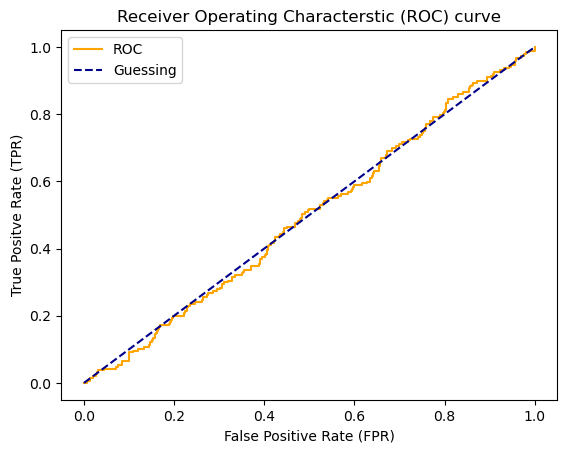

In [324]:
lg_pred_b = lg_clf.predict_proba(x_test)
pos_pred = lg_pred_b[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
plot_roc_curve(fpr, tpr);

##### 5.3.2.2 Random Forest

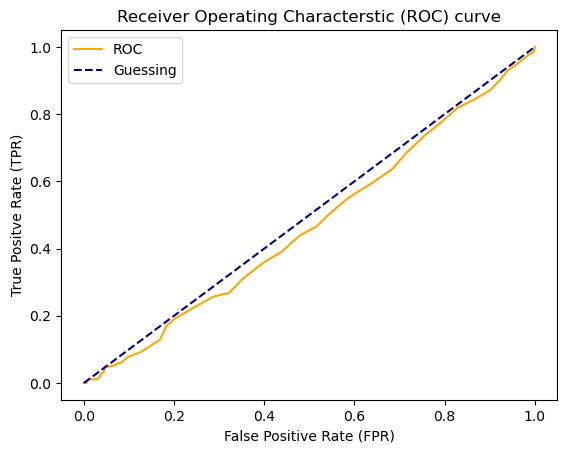

In [325]:
rf_pred_b = rf_clf.predict_proba(x_test)
pos_pred = rf_pred_b[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
plot_roc_curve(fpr, tpr);

##### 5.3.2.3 Gradient Boosting

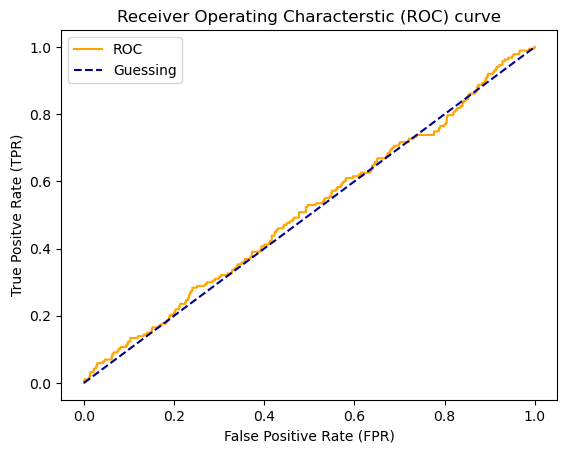

In [326]:
gb_pred_b = gb_clf.predict_proba(x_test)
pos_pred = gb_pred_b[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
plot_roc_curve(fpr, tpr);

#### 5.3.2.4 XGBoost

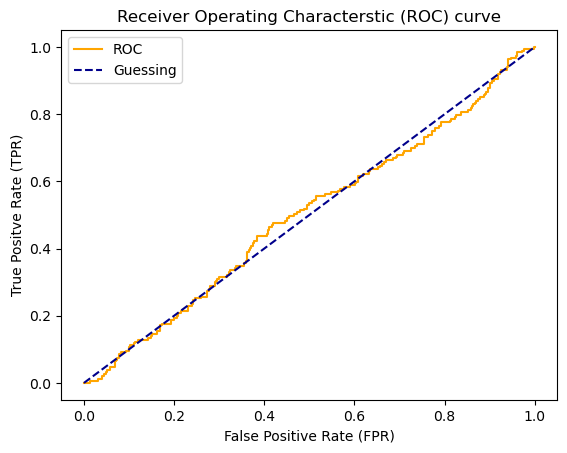

In [327]:
xg_pred_b = xg_clf.predict_proba(x_test)
pos_pred = xg_pred_b[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
plot_roc_curve(fpr, tpr);

#### 5.3.2.5 AdaBoost

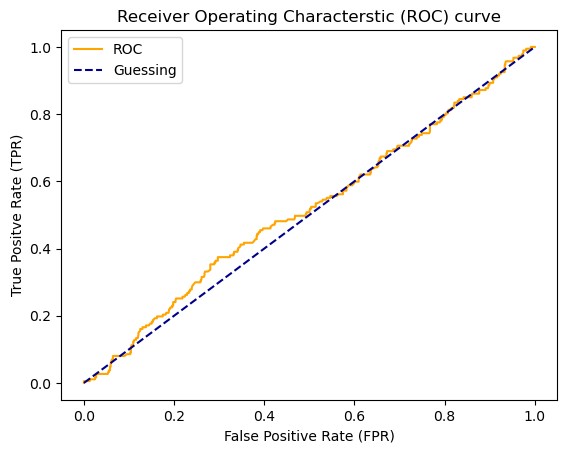

In [328]:
ab_pred_b = ab_clf.predict_proba(x_test)
pos_pred = ab_pred_b[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
plot_roc_curve(fpr, tpr);

#### 5.3.3 Confusion Matrix

In [339]:
from sklearn.metrics import confusion_matrix

##### 5.3.3.1 LogisticRegression

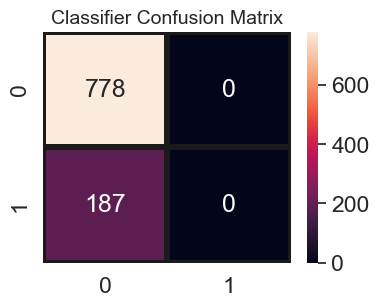

In [342]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lg_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix",fontsize=14)
plt.show()

##### 5.3.3.2 Random Forest

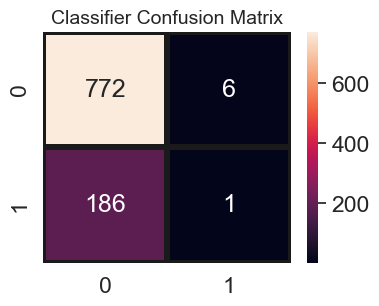

In [344]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix",fontsize=14)
plt.show()

##### 5.3.3.3 Gradient Boosting

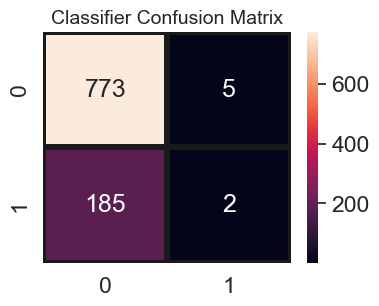

In [345]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix",fontsize=14)
plt.show()

##### 5.3.3.4 XGBoost

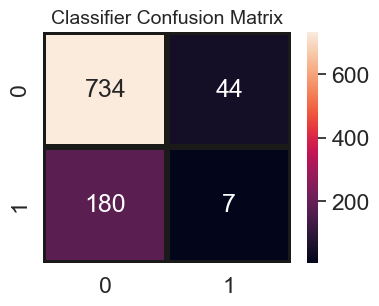

In [349]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xg_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix",fontsize=14)
plt.show()

##### 5.3.3.5 AdaBoost

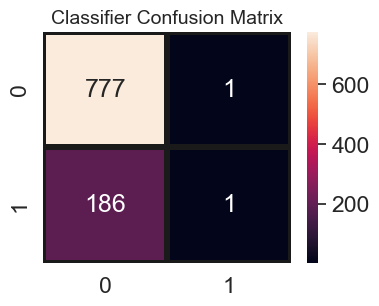

In [351]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ab_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix",fontsize=14)
plt.show()

### **Result**
* Here no model is peroforming good on churn data but if we wants to take one the we can go with `XGBoost`
* Let's FineTune this model

## 6. Finetuning

Parameters of XGBoost

In [352]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [353]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

clf = XGBClassifier()

gs_clf = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv=5,
                           verbose=2)
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [362]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

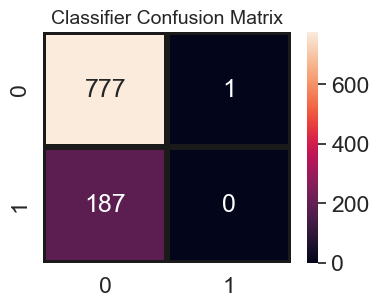

In [363]:
preds = gs_clf.predict(x_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix",fontsize=14)
plt.show()

In [360]:
gs_clf.score(x_test,y_test)

0.805181347150259

## Let's Make it balance data because we have unbalanced class

* We will use `Random Under sampling` because we have:
    * 1 - 963
    * 0 - 3858
* `963` is not a bad number but if we have more less data then we can go with `oversampling`
* but if we do oversampling it will badly effect our chur detection means we will detect a lot non churn subscribers to churn 

In [369]:
df_y.value_counts()

0
0    3858
1     963
Name: count, dtype: int64

In [391]:
#load dataset
data_df = pd.read_csv("Customer_churn_data.csv")

#drop null values
data_df = data_df.dropna()
print(data_df.isnull().sum())

#drop customer id
data_df = data_df.drop("CustomerID", axis=1)
#label encode data
categorical_features = ["Gender", "ContractType", "TechSupport", "InternetService", "PaperlessBilling", "PaymentMethod", "Churn"]
encoded_data =  data_df
label_encoder = LabelEncoder() 
for i in categorical_features:
    encoded_data[i] = label_encoder.fit_transform(data_df[i])
encoded_data.head()

CustomerID                 0
Age                        0
Gender                     0
ContractType               0
TechSupport                0
InternetService            0
Tenure                     0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
average_monthly_charges    0
customer_lifetime_value    0
dtype: int64


Age  Gender  ContractType  TechSupport  InternetService  Tenure  \
0   46       0             2            1                1      13   
1   46       0             2            0                1      45   
2   36       1             1            0                2       4   
3   32       1             1            0                2      18   
4   58       1             1            0                0      50   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0                 0              1      240.490678   2913.291300      0   
1                 0              2      211.898122   9096.153535      0   
2                 1              3      489.409449   1032.705208      1   
3                 1              0      562.296484   6463.180569      0   
4                 0              3      189.032991   4747.929909      0   

   average_monthly_charges  customer_lifetime_value  
0                54.670778               710.720113  
1                62.531257              2813.906565  
2                70.123459               280.493834  
3                74.371843              1338.693175  
4                42.237572              2111.878585

In [393]:
# class count
class_count_0, class_count_1 = encoded_data['Churn'].value_counts()

# Separate class
class_0 = encoded_data[encoded_data['Churn'] == 0]
class_1 = encoded_data[encoded_data['Churn'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (3858, 13)
class 1: (963, 13)


**Under sample**

total class of 1 and0: Churn
0    963
1    963
Name: count, dtype: int64


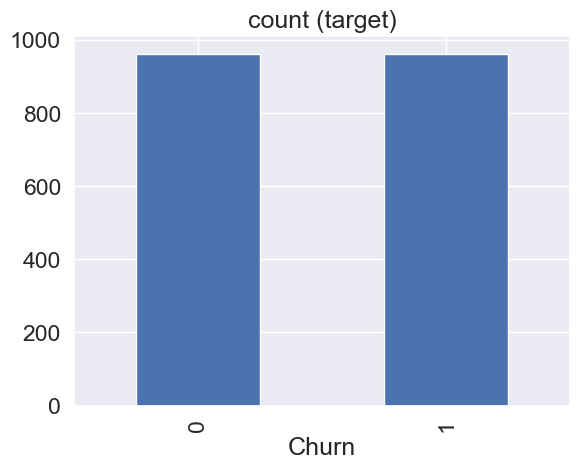

In [397]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Churn'].value_counts())# plot the count after under-sampeling
test_under['Churn'].value_counts().plot(kind='bar', title='count (target)');

**Now we have balanced data**

In [398]:
test_under.head()

Age  Gender  ContractType  TechSupport  InternetService  Tenure  \
777    53       1             0            1                1      29   
4142   69       0             1            1                0       1   
3616   24       0             2            1                0      35   
2582   29       1             1            0                0      67   
4147   27       0             1            0                0      13   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
777                  0              2       34.486630   1000.112263      0   
4142                 1              2       81.649707     81.649707      0   
3616                 1              2       78.807991   2758.279676      0   
2582                 1              0       52.109172   3491.314543      0   
4147                 0              0       56.279057    731.627736      0   

      average_monthly_charges  customer_lifetime_value  
777                 34.486630              1000.112263  
4142                81.649707                81.649707  
3616                78.807991              2758.279676  
2582                52.109172              3491.314543  
4147                56.279057               731.627736

**Note** - Now we have balanced data lets do modeling again

## Balanced data model building

## Initialise models

In [410]:
#Separate dependent and independent variables
x=test_under.drop("Churn", axis=1)
y=test_under['Churn']

#one hoe encoding
categorical_features = ["Gender", "ContractType", "TechSupport", "InternetService", "PaperlessBilling", "PaymentMethod"]
OneHot1 = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", OneHot1, categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

#train test split
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

In [411]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

#initialise model
lg_clf = LogisticRegression(random_state=0)
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
xg_clf = XGBClassifier()
ab_clf = AdaBoostClassifier()

### train model

In [412]:
#logistic regression
lg_clf.fit(x_train,y_train)
lg_preds = lg_clf.predict(x_test)
print("Logistic Regression")
print(classification_report(y_test, lg_preds))

#random forest
rf_clf.fit(x_train,y_train)
rf_preds = rf_clf.predict(x_test)
print("Random Forest")
print(classification_report(y_test, rf_preds))

#gradient boosting
gb_clf.fit(x_train,y_train)
gb_preds = gb_clf.predict(x_test)
print("Gradient Boosting")
print(classification_report(y_test, gb_preds))

#xgboost
xg_clf.fit(x_train,y_train)
xg_preds = xg_clf.predict(x_test)
print("XGBoost")
print(classification_report(y_test, xg_preds))

#AdaBoost
ab_clf.fit(x_train,y_train)
ab_preds = ab_clf.predict(x_test)
print("AdaBoost")
print(classification_report(y_test, ab_preds))

D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression
              precision    recall  f1-score   support

           0       0.48      0.67      0.56       178
           1       0.57      0.38      0.46       208

    accuracy                           0.51       386
   macro avg       0.53      0.52      0.51       386
weighted avg       0.53      0.51      0.50       386

Random Forest
              precision    recall  f1-score   support

           0       0.49      0.57      0.53       178
           1       0.57      0.48      0.52       208

    accuracy                           0.52       386
   macro avg       0.53      0.53      0.52       386
weighted avg       0.53      0.52      0.52       386

Gradient Boosting
              precision    recall  f1-score   support

           0       0.43      0.51      0.47       178
           1       0.51      0.44      0.47       208

    accuracy                           0.47       386
   macro avg       0.47      0.47      0.47       386
weighted avg       0.4

D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost
              precision    recall  f1-score   support

           0       0.49      0.56      0.52       178
           1       0.58      0.51      0.54       208

    accuracy                           0.53       386
   macro avg       0.54      0.54      0.53       386
weighted avg       0.54      0.53      0.53       386



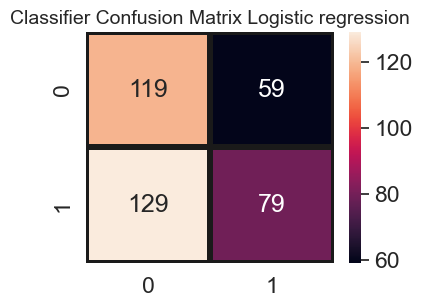

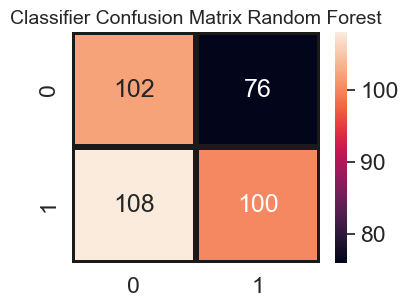

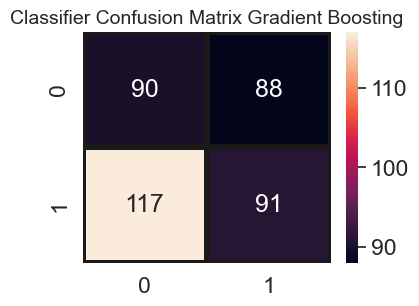

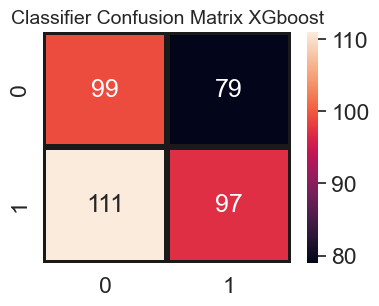

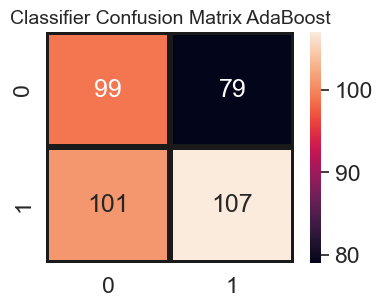

In [413]:
#logistic regression
preds = lg_clf.predict(x_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix Logistic regression",fontsize=14)
plt.show()

#Random Forest
preds = rf_clf.predict(x_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix Random Forest",fontsize=14)
plt.show()

#Gradient Boosting
preds = gb_clf.predict(x_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix Gradient Boosting",fontsize=14)
plt.show()

#XGBoost
preds = xg_clf.predict(x_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix XGboost",fontsize=14)
plt.show()

#AdaBoost
preds = ab_clf.predict(x_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix AdaBoost",fontsize=14)
plt.show()

**Result**
* Here AdaBoost is performing better than other models on churn data let's go with finetunning it

### Fine tunning
taken help from - https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20

##### AdaBoost

In [433]:
#import libraries
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [443]:
Input = x_train
Output =y_train

In [450]:
# defining the classifier
model = AdaBoostClassifier()

# creating a dic for the grid
grid = dict()

# estimator till 500
grid['n_estimators'] = [10, 50, 100, 200, 500]

# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]


# defining the CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')


# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(Input, Output)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Best: 0.512121 using {'learning_rate': 0.01, 'n_estimators': 200}


In [451]:
#AdaBoost
ab_preds = grid_result.predict(x_test)
print("AdaBoost")
print(classification_report(y_test, ab_preds))

AdaBoost
              precision    recall  f1-score   support

           0       0.47      0.56      0.51       178
           1       0.55      0.46      0.50       208

    accuracy                           0.51       386
   macro avg       0.51      0.51      0.51       386
weighted avg       0.51      0.51      0.51       386



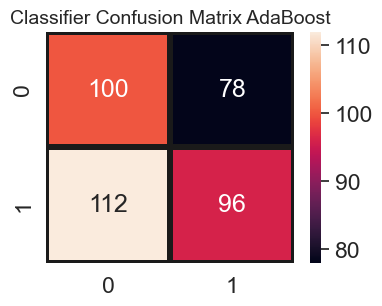

In [452]:
#AdaBoost
preds = grid_result.predict(x_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix AdaBoost",fontsize=14)
plt.show()

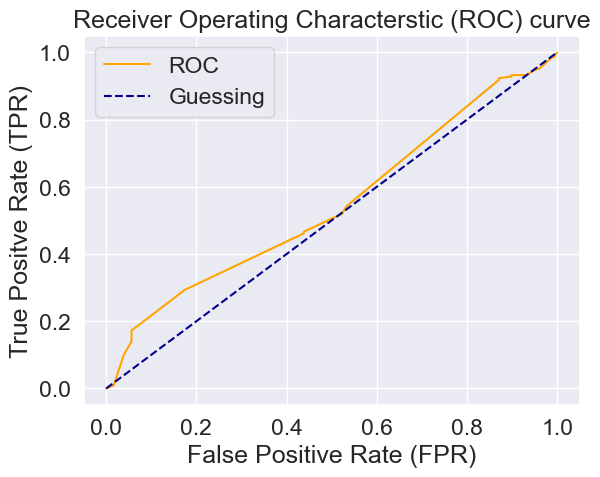

In [453]:
pred_b = grid_result.predict_proba(x_test)
pos_pred = pred_b[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
plot_roc_curve(fpr, tpr);

##### XGBoost

In [457]:
# defining the classifier
model1 = XGBClassifier(n_estimators=100, learning_rate=0.01)

# creating a dic for the grid
grid = dict()

grid = {'min_child_weight': [1, 5, 10],
 'gamma': [0.5, 1, 1.5, 2, 5],
 'subsample': [0.6, 0.8, 1.0],
 'colsample_bytree': [0.6, 0.8, 1.0],
 'max_depth': [3, 4, 5]}
# estimator till 500
#grid['n_estimators'] = [10, 50, 100, 200, 500]

# defining learning rate
#grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]

#defining Booster
#grid['booster'] = ['gbtree', 'gblinear', 'dart']


# defining the CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# initializing the grid search
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')


# training the model on grid search for hyperparameter tuning of Adaboost
grid_result1 = grid_search.fit(Input, Output)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Best: 0.518831 using {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}


In [459]:
model2 = RandomForestClassifier()
grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

gs_model = GridSearchCV(model2, grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

print("Best: %f using %s" % (gs_model.best_score_, gs_model.best_params_))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Machine learning 2024\think_humble\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

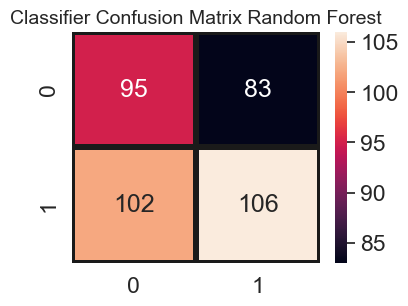

In [460]:
#Random Forest
preds = gs_model.predict(x_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Classifier Confusion Matrix Random Forest",fontsize=14)
plt.show()

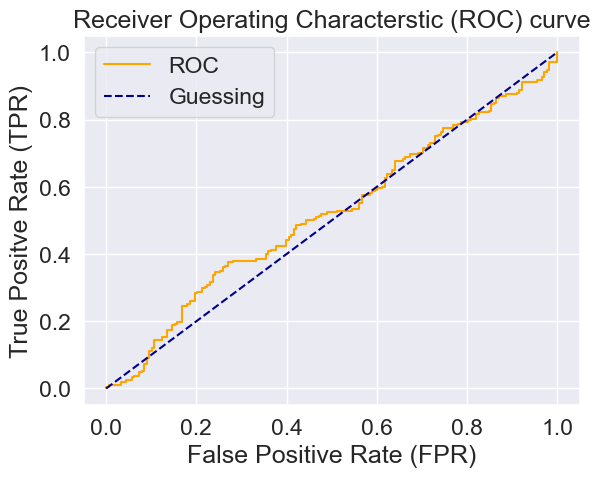

In [461]:
pred_b = gs_model.predict_proba(x_test)
pos_pred = pred_b[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
plot_roc_curve(fpr, tpr);

### Saving Model

In [462]:
import pickle

# save an exisitng model
pickle.dump(gs_model, open("gs_random_forest_classifier.pkl","wb"))

## THE End
* **Thank you for review**